In [0]:
#In DMRI-Diffusion MRI we use 3 types of files
#A Nifti file with diffusion weighted data and 2 text files 1 with B-values another with B-vectors
#DIPy- used for tools to load and process these files and provides access to publicly avilable datasets for those who haven't acquired their own datasets 

In [2]:
#installing dipy
!pip install dipy

     |████████████████████████████████| 8.1MB 9.1MB/s 


In [3]:
#use dipy to download fmri dataset
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

Download Progress: [########################################] 100.00%  of 0.01 MB

({'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7'),
  'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66')},
 '/root/.dipy/sherbrooke_3shell')

In [0]:
#by default datasets will go to .dipy folder inside home directory
from os.path import expanduser, join
home = expanduser('~')

In [0]:
#dname holds the directory name where 3 files are in 
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [6]:
#show complete file names
fdwi = join(dname, 'HARDI193.nii.gz')
print(fdwi)

fbval = join(dname, 'HARDI193.bval')
print(fbval)

fbvec = join(dname, 'HARDI193.bvec')
print(fbvec)

/root/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/root/.dipy/sherbrooke_3shell/HARDI193.bval
/root/.dipy/sherbrooke_3shell/HARDI193.bvec


In [0]:
#loading dmri datasets using nibabel 
#nibabel is used to read and write neuroimaging specific file formats
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img = True)

In [8]:
#data is a 4D array where first 3 dimensions are i,j,k voxel coordinates and last dimension is a number of non-weighted (S0s) and diffusion-weighted volumes
#to cheack the size of the data
print(data)
print(data.shape)

[[[[12 14 22 ... 11 10 27]
   [24 15 20 ...  9  5 13]
   [15 13  9 ... 34 32 18]
   ...
   [ 0  0  0 ...  0  0  0]
   [ 0  0  0 ...  0  0  0]
   [ 0  0  0 ...  0  0  0]]

  [[27 17 17 ... 26 23 47]
   [15 36 24 ... 22 13 22]
   [19 11  5 ... 26  9 29]
   ...
   [15 21  3 ... 19  7 19]
   [15 22 13 ... 22 17 24]
   [16 21 40 ... 14 11 22]]

  [[12 14 22 ... 11 10 27]
   [24 12 20 ...  9  5 11]
   [13 13 11 ... 30 41 13]
   ...
   [17 24 18 ... 11  5  8]
   [13 11 25 ... 18  6 26]
   [20 14 18 ... 22 10 27]]

  ...

  [[ 9 21 17 ...  8 19 22]
   [12 26 27 ... 20  3 15]
   [20 20  7 ... 29 27 21]
   ...
   [18 31  5 ... 30 18 17]
   [23 13 26 ... 16 20 29]
   [20 30  8 ...  7 30 12]]

  [[20 12  9 ...  4 25 15]
   [17 11 14 ...  7 38  4]
   [11  2  6 ...  7 23 23]
   ...
   [22 10 24 ... 19  6 10]
   [15 14 56 ... 12 41  8]
   [12 25 17 ... 37  9 19]]

  [[29 20 23 ... 12 25 10]
   [18 23 21 ... 22 31 19]
   [12 17 12 ... 17 33 17]
   ...
   [16 17 14 ... 31  4 24]
   [11 10 31 ... 22 20 

In [9]:
#checking dimensions of each voxel 
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


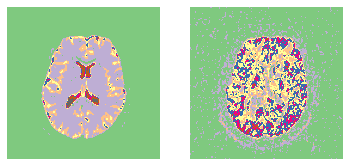

<Figure size 432x288 with 0 Axes>

In [10]:
#visualizing results in matplotlib
#example to show middle axial slices of volume 0 and volume 10
import matplotlib.pyplot as plt
axial_middle = data.shape[2] // 2
plt.figure('showing the datasets')
plt.subplot(1,2,1).set_axis_off()
plt.imshow(data[:,:, axial_middle, 0].T ,cmap='Accent', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='Accent', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [0]:
#next step is to show b-values and b-vectors from disk of function read_bvals_bvecs
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [0]:
#gradient table is used to hold acquisition specific parameters ie; bvals, bvecs, timings,etc.
#to create such object use function gradient_table
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [13]:
print(gtab.info)

None


In [14]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [15]:
print(gtab.bvecs)

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]
 [ 0.50413    -0.846694    0.170183  ]
 [ 0.345199   -0.850311    0.397252  ]
 [ 0.456765   -0.635672    0.622323  ]
 [-0.487481   -0.393908   -0.779229  ]
 [-0.617033    0.676849   -0.40143   ]
 [-0.578512   -0.109347    0.808311  ]
 [-0.825364   -0.525034   -0.207636  ]
 [ 0.895076   -0.0448242   0.443655  ]
 [ 0.289992   -0.545473    0.786361  ]
 [ 0.115014   -0.96405     0.239541  ]
 [-0.799934    0.407767    0.440264  ]
 [ 0.512494    0.842139   -0.167785  ]
 [-0.790005    0.157993    0.592394  ]
 [ 0.949281   -0.237695   -0.20583   ]
 [ 0.232318    0.787051   -0.571472  ]
 [-0.0196707  -0.192031  

In [0]:
#bvalues shape(193,)
#min 0.000000 max 3500.000000
#bvectors shape(193,3)
#min -0.964050 max 0.999992

In [0]:
#gtab can also be used to tell what part of data is S0 vollumes ie; volumes which correspond to b-values of 0
S0s = data[:, :, :, gtab.b0s_mask]

In [18]:
#we have only one S0 
print(S0s.shape)

(128, 128, 60, 1)


In [0]:
#save nifti file
from dipy.io.image import save_nifti
save_nifti('HARDI193_S0.nii.gz', S0s, affine)

In [21]:
!pip install fury

     |████████████████████████████████| 153kB 29.7MB/s 
     |████████████████████████████████| 48.9MB 64kB/s 


In [0]:
#import all imp libraries
from os.path import join as pjoin
import numpy as np
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi
from dipy.data.fetcher import fetch_syn_data
from dipy.io.image import load_nifti
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)

In [23]:
#fetch 2 b0 volumes then the static image will be b0 from standford hardi datasets
files, folder = fetch_stanford_hardi()
static_data, static_affine = load_nifti(pjoin(folder, 'HARDI150.nii.gz'))
static = np.squeeze(static_data)[..., 0]
static_grid2world = static_affine

Download Progress: [########################################] 100.00%  of 0.00 MB

In [24]:
files, folder = fetch_syn_data()
moving_data, moving_affine = load_nifti(pjoin(folder, 'b0.nii.gz'))
moving = moving_data
moving_grid2world = moving_affine

Download Progress: [########################################] 100.00%  of 1.34 MB

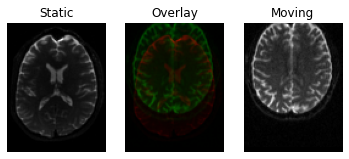

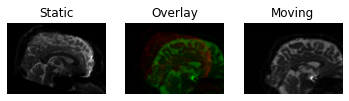

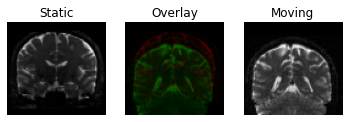

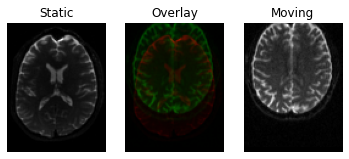

In [25]:
identity = np.eye(4)
affine_map = AffineMap(identity,
                       static.shape, static_grid2world,
                       moving.shape, moving_grid2world)
resampled = affine_map.transform(moving)
regtools.overlay_slices(static, resampled, None, 0,
                        "Static", "Moving", "resampled_0.png")
regtools.overlay_slices(static, resampled, None, 1,
                        "Static", "Moving", "resampled_1.png")
regtools.overlay_slices(static, resampled, None, 2,
                        "Static", "Moving", "resampled_2.png")

In [0]:
c_of_mass = transform_centers_of_mass(static, static_grid2world,
                                      moving, moving_grid2world)

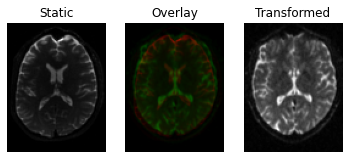

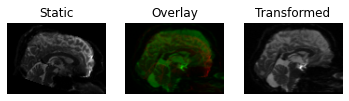

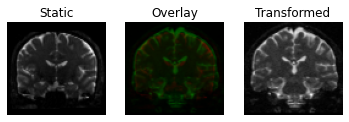

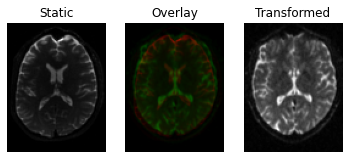

In [27]:
transformed = c_of_mass.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_com_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_com_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_com_2.png")

In [0]:
nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)

In [0]:
level_iters = [10000, 1000, 100]

In [0]:
sigmas = [3.0, 1.0, 0.0]

In [0]:
factors = [4, 2, 1]

In [0]:
affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)

In [33]:
transform = TranslationTransform3D()
params0 = None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0,
                              static_grid2world, moving_grid2world,
                              starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


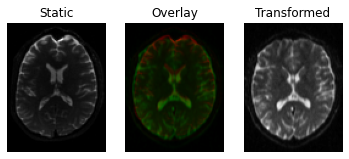

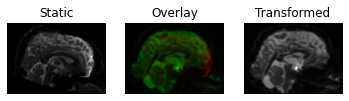

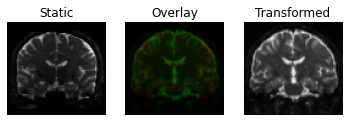

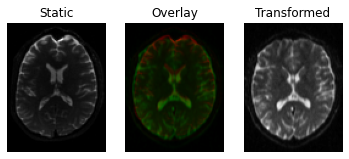

In [34]:
transformed = translation.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_trans_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_trans_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_trans_2.png")

In [35]:
transform = RigidTransform3D()
params0 = None
starting_affine = translation.affine
rigid = affreg.optimize(static, moving, transform, params0,
                        static_grid2world, moving_grid2world,
                        starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


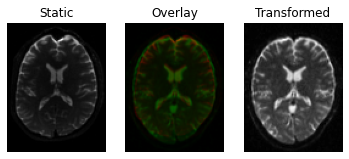

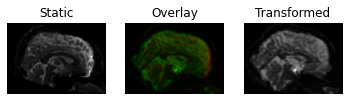

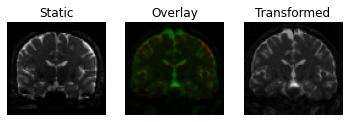

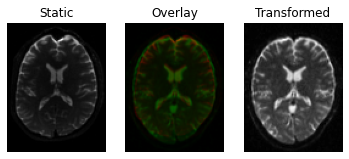

In [36]:
transformed = rigid.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_rigid_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_rigid_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_rigid_2.png")

In [37]:
transform = AffineTransform3D()
params0 = None
starting_affine = rigid.affine
affine = affreg.optimize(static, moving, transform, params0,
                         static_grid2world, moving_grid2world,
                         starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


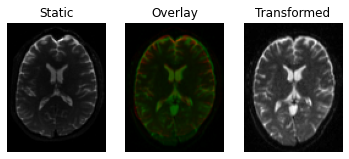

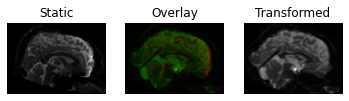

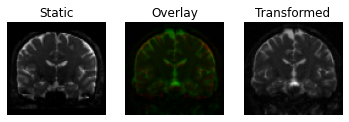

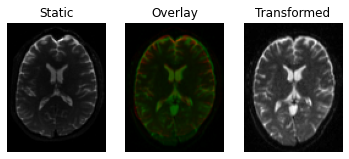

In [38]:
transformed = affine.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_affine_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_affine_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_affine_2.png")